# Bayesian inference

## Frequentist viewpoint

Probability of an event is long-run average over repeated trials.
$$
P(A) = \lim_{N\to \infty} \frac{ \#A }{N}
$$
Probabilities are fixed and objective.  


### Examples

1. Estimate some probability of a distribution
$$
P(X \le x) = \frac{ \sum_{i=1}^N \mathbf{1}\{X_i \le x\}}{N}
$$


2. coverage of a confidence interval
$$
1 - \alpha = P_{\theta}(\theta \in C_{\alpha}(X))
$$


3. size of a hypothesis test
$$ 
\alpha = P_{\theta}(T(X) \in R_{\alpha})
$$



## Bayesian viewpoint
Probabilities are dynamic and measure a degree of belief about an event.  Start with a prior belief and update after observing data
$$
    P(A|X) = \frac{P(X|A)P(A)}{P(X)}
$$

Can answer questions like: what is the probability that the Braves will win the world series again next year?  This isn't a repeatable experiment, but we can still have some degree of belief or prior knowledge.  E.g. use historical data to get an idea of the probability.

## Posterior, Prior, and Likelihood


Suppose we want to estimate some parameter $\theta$ of a distribution $f(x;\theta)$.  

$\theta$ is unknown/uncertain so treat it as a random variable


### Prior
Before we observe any data suppose we believe that $\theta \sim p(\theta)$, **prior** distribution

Distribution for possible values of $\theta$, so can pick a single point many ways

1. Mean 
$$
    \hat{\theta} = \int \theta p(\theta) \mathrm{d}\theta
$$

2. Mode - most likely value/ MAP
$$
    \hat{\theta} = \mathrm{argmax}_{\theta}\ p(\theta)
$$

3. other options


### Likelihood

Now suppose we actually observe some data $X_1,\ldots,X_n \sim f(x;\theta)$

$L(\theta) = f(X_1,\ldots,X_n;\theta)$ is the likelihood function and we need some model for how the data was observed (i.e. requires domain knowledge)

### Posterior

Update beliefs after observing data with Bayes' formula
$$
p(\theta|X_1,\ldots,X_n) = \frac{ L(\theta;X_1,\ldots,X_n) p(\theta) }{ \int L(\theta;X_1,\ldots,X_n) p(\theta) \mathrm{d}\theta  }
$$

Denominator is called the normalizing/normalization constant.  Also called the partition function in physics

Again have a distribution of possible values for $\theta$ so can pick one value as the estimator

1. Posterior mean (aka Bayes' estimate)

2. Posterior mode (aka MAP point), MAP stands for maximum a posteriori 

3. other?

## Example

Suppose you're on top of a building and you want to figure out how tall it is.  You know that the building is 10 stories tall and each story is about 14 feet $\pm 1$ foot on average, so you decide to use the following prior for the height $\theta$ of the building

$$
p(\theta) = N(140, 10)
$$

Your prior estimate based on no data is $\hat{\theta} = 140$ft.

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

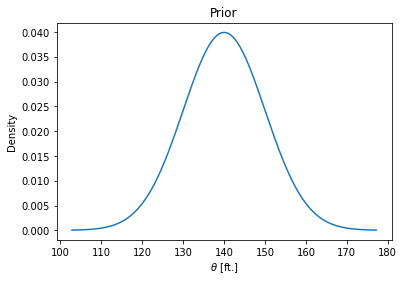

In [2]:
# Plot prior distribution
xx = np.linspace(stats.norm.ppf(1e-4, loc=140, scale=10), stats.norm.ppf(1-1e-4, loc=140, scale=10), 1000)
plt.plot(xx, stats.norm.pdf(xx, loc=140, scale=10))
plt.xlabel(r'$\theta$ [ft.]')
plt.ylabel(r'Density')
plt.title(r'Prior');

To get a more accurate result suppose you drop a ball from the top of the building and record how long it takes until it hits the ground.  Using the laws of physics you know that from height $\theta$, the time taken to hit the ground in seconds is $x$ with

$$
x = \sqrt{ \frac{2\theta}{32.18} }
$$

We also need to take into account some measurement error and delay from reaction time.  So let's say that our measurements are off by $\pm 0.25$s. 

Let's use the following likelihood model for $X$ 
$$
X \sim N\left( \sqrt{ \frac{2\theta}{32.18} },\ 0.25^2   \right)
$$


The unnormalized posterior distribution after observing one data point $x$ is
$$
    p(\theta|x) \propto N\left( \sqrt{ \frac{2\theta}{32.18} },\ 0.25^2   \right) N(140,\ 10)
$$

For the sake of this example suppose $\theta^* = 150$ft. is the true height of the building so we can generate a fake data point using the likelihood model.

In [3]:
g = 32.18
theta_star = 150
x = stats.norm.rvs(loc=np.sqrt(2*theta_star/g), scale=0.25**2)
print("Observed Data = {:0.2f}s".format(x))

Observed Data = 3.04s


In [4]:
# Define posterior
def unnormalized_posterior(theta, x):
    like = np.prod(stats.norm.pdf(x, loc=np.sqrt(2*theta/g), scale=0.25**2))
    prior = stats.norm.pdf(theta, loc=140, scale=10)
    return like*prior

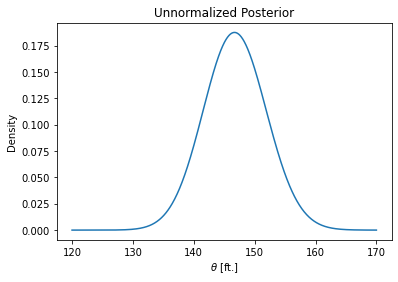

In [5]:
# Plot the unnormalized posterior

vposterior = np.vectorize(lambda t: unnormalized_posterior(t, x))

tt = np.linspace(120, 170, 1000)
post_vals = vposterior(tt)
plt.plot(tt, post_vals)
plt.xlabel(r'$\theta$ [ft.]')
plt.ylabel(r'Density')
plt.title(r'Unnormalized Posterior');

Posterior mean is between 140ft. and 150ft.  What happens if we add more and more data?

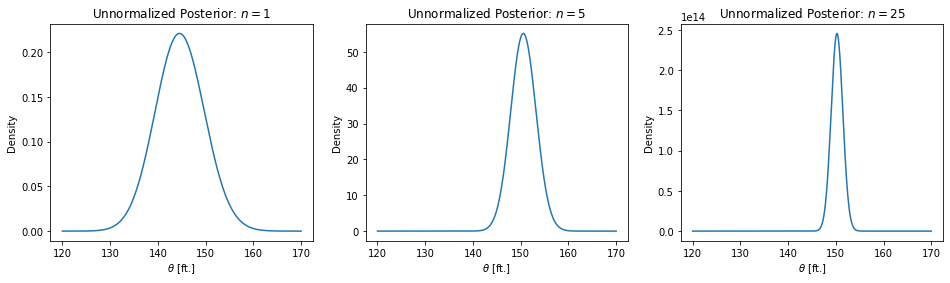

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(16,4), sharex=True)

# n=1
x = stats.norm.rvs(loc=np.sqrt(2*theta_star/g), scale=0.25**2, size=1)
vposterior = np.vectorize(lambda t: unnormalized_posterior(t, x))
tt = np.linspace(120, 170, 1000)
post_vals = vposterior(tt)
ax[0].plot(tt, post_vals)
ax[0].set_xlabel(r'$\theta$ [ft.]')
ax[0].set_ylabel(r'Density')
ax[0].set_title(r'Unnormalized Posterior: $n=1$');


# n=5
x = stats.norm.rvs(loc=np.sqrt(2*theta_star/g), scale=0.25**2, size=5)
vposterior = np.vectorize(lambda t: unnormalized_posterior(t, x))
tt = np.linspace(120, 170, 1000)
post_vals = vposterior(tt)
ax[1].plot(tt, post_vals)
ax[1].set_xlabel(r'$\theta$ [ft.]')
ax[1].set_ylabel(r'Density')
ax[1].set_title(r'Unnormalized Posterior: $n=5$');

# n=25
x = stats.norm.rvs(loc=np.sqrt(2*theta_star/g), scale=0.25**2, size=25)
vposterior = np.vectorize(lambda t: unnormalized_posterior(t, x))
tt = np.linspace(120, 170, 1000)
post_vals = vposterior(tt)
ax[2].plot(tt, post_vals)
ax[2].set_xlabel(r'$\theta$ [ft.]')
ax[2].set_ylabel(r'Density')
ax[2].set_title(r'Unnormalized Posterior: $n=25$');

Posterior distribution concentrates around the true value $\theta^*$ as more and more data is observed.  Posterior mean becomes a more and more accurate estimator.

## Inference with the posterior

So far we only know how to compute the unnormalized posterior, but we are intersted in the posterior mean
$$
    \int \theta p(\theta\mid X_1,\ldots,X_n) \mathrm{d}\theta
$$
which depends on the unknown normalizing constant.


Some options:

1. Analytic calculation of the integral e.g. recognize that the posterior distribution is normal to compute the correct normalizing constant and mean -- very limited cases, usually with a conjugate prior (i.e. posterior and prior are in the same family)

2. Compute integral numerically using quadrature rule (e.g. Gauss quadrature) -- only useful if the dimension of the parameter is small (< 3 dimensions roughly) and the density is smooth (i.e. no jumps or discontinuities)

3. Use a Monte Carlo method to sample from the posterior $\theta^{(t)}$ for $t=1,\ldots,T$ and compute
$$
    \hat{\theta} = \frac{1}{T} \sum_{i=1}^T \theta^{(t)}
$$
Definitely the most common and flexible approach, but computationally expensive!

4. Use an approximation to the posterior (e.g. approximate by normal distribution) and then compute the mean w.r.t. the approximation.  Sometimes referred to as variational inference in machine learning.

## Method 1: Example

Suppose $X_1,\ldots,X_n \sim \text{Poisson}(\lambda)$.  The pmf is

$$
f(x;\lambda) = \frac{\lambda^x e^{-\lambda}}{x!}
$$

Suppose we have a prior belief that

$$
\lambda \sim \Gamma(\alpha, \beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha-1} \mathrm{e}^{-\beta \lambda}
$$

Then the posterior is

$$
p(\lambda \mid X_1,\ldots, X_n) = \Gamma \left( \alpha + \sum_{i=1}^n X_i,\ n + \beta \right)
$$

In this case the prior is the conjugate prior for the Poisson likelihood.

## Method 2: Numerical integration

Can use Gaussian quadrature.  In moderate dimensions (e.g. dimensions 4 - 10 roughly) it's more common to use quasi-Monte Carlo or sparse grid techniques.

## Method 3: Monte Carlo

Huge area of research.  Many methods don't require knowing the normalizing constant!

Some common methods:

1. Rejection sampling -- draw lots of samples from a proposal distribution and reject ones every so often to give the correct posterior probability

2. Importance sampling -- draw samples from a proposal distribution and reweight them according to the posterior

3. Markov chain Monte Carlo (MCMC) -- construct a Markov chain that converges in distribution to the posterior


MCMC is very useful for Bayesian inference and some common samplers are
- Metropolis-Hastings
- Metropolis Adjusted Langevin Algorithm
- Hamiltonian Monte Carlo (used in probabilistic programming languages like Stan and by far the default)

## Method 4: Approximating the posterior

Looking at the example from before, we saw that asymptotically the prior is unimportant if we have enough data.

### Laplace approximation (Bernstein von Mises theorem)
Let's approximate the posterior by a normal distribution.

$$
    q(\theta) \sim N\left(\theta_{\mathrm{MAP}},\  \frac{1}{nI(\theta_{\mathrm{MAP}})} \right)
$$

where $\theta_{\mathrm{MAP}}$ is the MAP point of the posterior and $I(\theta)$ is the Fisher information from the likelihood model.  When $n$ is large, this approximation becomes more and more valid, which is the **Bernstein von Mises theorem**.

Let's look at the gamma distribution example from Method 1.

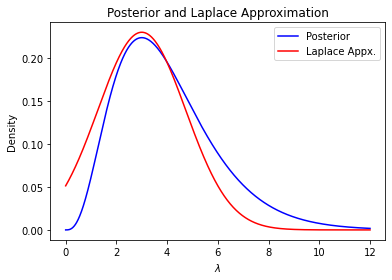

In [7]:
alpha = 4.
beta = 1.

xx = np.linspace(0, 12, 1000)
px = stats.gamma.pdf(xx, alpha, scale=1/beta)
theta_map = (alpha - 1)/beta

lx = stats.norm.pdf(xx, loc=theta_map, scale=np.sqrt(theta_map))

plt.plot(xx, px, c='b', label='Posterior')
plt.plot(xx, lx, c='r', label='Laplace Appx.')
plt.legend()
plt.title(r'Posterior and Laplace Approximation')
plt.ylabel(r'Density')
plt.xlabel(r'$\lambda$');

Laplace approximation is a very basic approximation of the posterior and is essentially a second-order Taylor expansion of the log posterior density.

Newer methods from machine learning/scientific computing can give better approximations:
1. Transport maps
2. Normalizing flows (RealNVP, NICE, etc.)

## Credible/Posterior intervals

For frequentist statistics we're interested in the uncertainty of some point estimate and can construct a confidence interval.

For Bayesian statistics we know the distribution of the parameter given all available information so a credible interval is just any interval that contains $1-\alpha$ of the probability.

Can be determined/approximated using any of the 4 methods described above.

## Hypothesis testing

Determine 
$$
    P(H_0 \mid X_1,\ldots, X_n)
$$